In [1]:
# MODEL BUILDING

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [5]:
print(np.__version__)

1.26.4


In [7]:
print(pd.__version__)

2.2.2


In [9]:
import sklearn
print(sklearn.__version__)

1.4.2


In [11]:
import eeg_dataloader

In [13]:
# BINARY CLASSIFICATION

In [15]:
x_trainB, y_trainB, x_valB, y_valB= eeg_dataloader.Binary_Classification_Restructure()

In [16]:
print(x_trainB.shape, y_trainB.shape, x_valB.shape, y_valB.shape)

(11025, 178) (11025,) (3000, 178) (3000,)


In [17]:
models = []
accuracies = []
precisions = []
recalls = []
f1score = []

models_s = []
accuracies_s = []
precisions_s = []
recalls_s = []
f1score_s = []

In [21]:
binary_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter = 3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbour": KNeighborsClassifier()
}

binary_results = []
for name, clf in binary_classifiers.items():
    models.append(clf)
    clf.fit(x_trainB, y_trainB)
    predictions = clf.predict(x_valB)
    num_correct = sum((x == y) for x, y in zip(predictions, y_valB))
    accuracy = accuracy_score(y_valB, predictions)
    accuracies.append(accuracy)
    precisions.append(precision_score(y_valB, predictions, average="weighted"))
    recalls.append(recall_score(y_valB, predictions, average="weighted"))
    f1score.append(f1_score(y_valB, predictions, average="weighted"))
    print(f"{clf}")
    print(f"Results : {num_correct}/{len(x_valB)}, {accuracy*100:.2f}%") 
    print("Confusion Matrix:\n", confusion_matrix(y_valB, predictions))
    print("Accuracy Report:\n", classification_report(y_valB, predictions))
    print(".....................................................")

LogisticRegression(max_iter=3000)
Results : 2091/3000, 69.70%
Confusion Matrix:
 [[1825  578]
 [ 331  266]]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      2403
           1       0.32      0.45      0.37       597

    accuracy                           0.70      3000
   macro avg       0.58      0.60      0.58      3000
weighted avg       0.74      0.70      0.71      3000

.....................................................
DecisionTreeClassifier()
Results : 2733/3000, 91.10%
Confusion Matrix:
 [[2217  186]
 [  81  516]]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2403
           1       0.74      0.86      0.79       597

    accuracy                           0.91      3000
   macro avg       0.85      0.89      0.87      3000
weighted avg       0.92      0.91      0.91      3000

.................................................

In [23]:
print(models)
print(accuracies)
print(precisions)
print(recalls)
print(f1score)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]
[0.697, 0.911, 0.962, 0.9666666666666667, 0.959, 0.9483333333333334]
[0.7407444473265394, 0.9190398228113633, 0.9654964874551971, 0.9685195101058527, 0.9608151172109798, 0.9487051301422958]
[0.697, 0.911, 0.962, 0.9666666666666667, 0.959, 0.9483333333333334]
[0.7147603746940986, 0.9136030602304163, 0.962851642562973, 0.9671799231668389, 0.9595739315083732, 0.9462263488118998]


In [25]:
# Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_trainS = scaler.fit_transform(x_trainB)
x_valS = scaler.transform(x_valB)

In [27]:
# Comparing with scaled features

In [29]:
binary_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbour": KNeighborsClassifier()
}

for name, clf in binary_classifiers.items():
    clf.fit(x_trainS, y_trainB)
    predictions = clf.predict(x_valS)
    num_correct = sum((x == y) for x, y in zip(predictions, y_valB))
    accuracy = accuracy_score(y_valB, predictions)
    accuracies_s.append(accuracy)
    precisions_s.append(precision_score(y_valB, predictions, average="weighted"))
    recalls_s.append(recall_score(y_valB, predictions, average="weighted"))
    f1score_s.append(f1_score(y_valB, predictions, average="weighted"))
    print(f"{clf}")
    print(f"Results : {num_correct}/{len(x_valB)}, {accuracy*100:.2f}%") 
    print("Confusion Matrix:\n", confusion_matrix(y_valB, predictions))
    print("Accuracy Report:\n", classification_report(y_valB, predictions))
    print(".....................................................")

LogisticRegression(max_iter=3000)
Results : 2148/3000, 71.60%
Confusion Matrix:
 [[1882  521]
 [ 331  266]]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      2403
           1       0.34      0.45      0.38       597

    accuracy                           0.72      3000
   macro avg       0.59      0.61      0.60      3000
weighted avg       0.75      0.72      0.73      3000

.....................................................
DecisionTreeClassifier()
Results : 2731/3000, 91.03%
Confusion Matrix:
 [[2215  188]
 [  81  516]]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2403
           1       0.73      0.86      0.79       597

    accuracy                           0.91      3000
   macro avg       0.85      0.89      0.87      3000
weighted avg       0.92      0.91      0.91      3000

.................................................

In [30]:
print(models)
print(accuracies_s)
print(precisions_s)
print(recalls_s)
print(f1score_s)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]
[0.716, 0.9103333333333333, 0.9623333333333334, 0.967, 0.959, 0.949]
[0.7484543373424106, 0.9185996792841304, 0.9657524143280324, 0.9687941232048375, 0.9608151172109798, 0.9493439553316245]
[0.716, 0.9103333333333333, 0.9623333333333334, 0.967, 0.959, 0.949]
[0.7296493323048256, 0.9129997341904234, 0.9631676444736671, 0.9674989320056251, 0.9595739315083732, 0.9469620824805343]


In [33]:
# OPTIMIZATION

In [35]:
# Boosting , converts weak learners to strong learners

In [37]:
# AdaBoost - Adjusts weights of wrongly classified instances and trains sequentially

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# Decision trees
models.append("AdaBoost_DT")
base_clf_dt = DecisionTreeClassifier(max_depth = 10)
adaboost_dt = AdaBoostClassifier(estimator=base_clf_dt, learning_rate=0.7, random_state=5)
adaboost_dt.fit(x_trainB, y_trainB)

predictions_dt = adaboost_dt.predict(x_valB)

# Performance metrics 

accuracy_dt = accuracy_score(y_valB, predictions_dt)
print(f"Accuracy = {accuracy_dt*100:.2f}") 
accuracies.append(accuracy_dt)
precisions.append(precision_score(y_valB, predictions_dt, average="weighted"))
recalls.append(recall_score(y_valB, predictions_dt, average="weighted"))
f1score.append(f1_score(y_valB, predictions_dt, average="weighted"))

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 95.40


In [43]:
# Boosting with scaled features
base_clf_dt_s = DecisionTreeClassifier(max_depth = 10)
adaboost_dt_s = AdaBoostClassifier(estimator=base_clf_dt_s, learning_rate=0.7, random_state=1)
adaboost_dt_s.fit(x_trainS, y_trainB)

predictions_dt_s = adaboost_dt_s.predict(x_valS)

# Performance metrics 
accuracy_dt_s = accuracy_score(y_valB, predictions_dt_s)
print(f"Accuracy = {accuracy_dt*100:.2f}%")

accuracies_s.append(accuracy_dt_s)
precisions_s.append(precision_score(y_valB, predictions_dt_s, average="weighted"))
recalls_s.append(recall_score(y_valB, predictions_dt_s, average="weighted"))
f1score_s.append(f1_score(y_valB, predictions_dt_s, average="weighted"))

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 95.40%


In [45]:
# Naive Bayes

In [47]:
models.append("AdaBoost_NB")
base_clf_nb = GaussianNB()
adaboost_nb = AdaBoostClassifier(estimator=base_clf_nb, n_estimators=1000, random_state=3)
adaboost_nb.fit(x_trainB, y_trainB)

predictions_nb = adaboost_nb.predict(x_valB)

# Performance metrics 
accuracy_nb = accuracy_score(y_valB, predictions_nb)
print(f"Accuracy = {accuracy_nb*100:.2f}%")

accuracies.append(accuracy_nb)
precisions.append(precision_score(y_valB, predictions_nb, average="weighted"))
recalls.append(recall_score(y_valB, predictions_nb, average="weighted"))
f1score.append(f1_score(y_valB, predictions_nb, average="weighted"))

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 94.23%


In [48]:
# With Feature Scaling

base_clf_nb_s = GaussianNB()
adaboost_nb_s = AdaBoostClassifier(estimator=base_clf_nb_s, n_estimators=1000, random_state=4)
adaboost_nb_s.fit(x_trainS, y_trainB)

predictions_nb_s = adaboost_nb_s.predict(x_valS)

# Performance metrics 
accuracy_nb_s = accuracy_score(y_valB, predictions_nb_s)
print(f"Accuracy = {accuracy_nb*100:.2f}%")

accuracies_s.append(accuracy_nb_s)
precisions_s.append(precision_score(y_valB, predictions_nb_s, average="weighted"))
recalls_s.append(recall_score(y_valB, predictions_nb_s, average="weighted"))
f1score_s.append(f1_score(y_valB, predictions_nb_s, average="weighted"))

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 94.23%


In [ ]:
# Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
models.append("Gradient Boost")
gradb_clf = GradientBoostingClassifier(learning_rate= 1.0, max_depth=6, random_state=1)
gradb_clf.fit(x_trainB, y_trainB)
predictions_gb = gradb_clf.predict(x_valB)

accuracy_gb = accuracy_score(y_valB, predictions_gb)
print(f"Accuracy = {accuracy_gb*100:.2f}")
accuracies.append(accuracy_gb)
precisions.append(precision_score(y_valB, predictions_gb, average="weighted"))
recalls.append(recall_score(y_valB, predictions_gb, average="weighted"))
f1score.append(f1_score(y_valB, predictions_gb, average="weighted"))

Accuracy = 96.70


In [51]:
# With Feature Scaling

from sklearn.ensemble import GradientBoostingClassifier

gradb_clf_s = GradientBoostingClassifier(learning_rate=1.0, max_depth=6, random_state=1)
gradb_clf_s.fit(x_trainS, y_trainB)
predictions_gb_s = gradb_clf_s.predict(x_valS)

accuracy_gb_s = accuracy_score(y_valB, predictions_gb_s)
print(f"Accuracy = {accuracy_gb_s*100:.2f}")
accuracies_s.append(accuracy_gb_s)
precisions_s.append(precision_score(y_valB, predictions_gb_s, average="weighted"))
recalls_s.append(recall_score(y_valB, predictions_gb_s, average="weighted"))
f1score_s.append(f1_score(y_valB, predictions_gb_s, average="weighted"))

Accuracy = 96.70


In [149]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 363.1 kB/s eta 0:05:44
   ---------------------------------------- 0.1/124.9 MB 599.1 kB/s eta 0:03:29
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:53
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:41
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:24
   ---------------------------------------- 0.7/124.9 MB 1.8 MB/s eta 0:01:08
   ---------------------------------------- 0.9/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 1.0/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.2/124.9 MB 2.3 MB/s eta 

In [52]:
# XG Boost

from xgboost import XGBClassifier
models.append("XGBoost")
xgb_clf = XGBClassifier(learning_rate = 0.7, max_depth=5, random_state=7)
xgb_clf.fit(x_trainB, y_trainB)
predictions_xgb = xgb_clf.predict(x_valB)

accuracy_xgb = accuracy_score(y_valB, predictions_xgb)
print(f"Accuracy = {accuracy_xgb*100:.2f}")
accuracies.append(accuracy_xgb)
precisions.append(precision_score(y_valB, predictions_xgb, average="weighted"))
recalls.append(recall_score(y_valB, predictions_xgb, average="weighted"))
f1score.append(f1_score(y_valB, predictions_xgb, average="weighted"))

Accuracy = 96.63


In [53]:
# With Feature Scaling

from xgboost import XGBClassifier

xgb_clf_s = XGBClassifier(learning_rate=10.0, max_depth=5, random_state=7)
xgb_clf_s.fit(x_trainS, y_trainB)
predictions_xgb_s = xgb_clf_s.predict(x_valS)

accuracy_xgb_s = accuracy_score(y_valB, predictions_xgb_s)
print(f"Accuracy = {accuracy_xgb_s*100:.2f}")
accuracies_s.append(accuracy_xgb_s)
precisions_s.append(precision_score(y_valB, predictions_xgb_s, average="weighted", zero_division=0))
recalls_s.append(recall_score(y_valB, predictions_xgb_s, average="weighted"))
f1score_s.append(f1_score(y_valB, predictions_xgb_s, average="weighted"))

Accuracy = 84.10


In [75]:
print(models)
print(f1score_s)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), 'RandomForestClassifier()', SVC(), GaussianNB(), KNeighborsClassifier(), 'AdaBoost_DT', 'AdaBoost_NB', 'Gradient Boost', 'XGBoost', 'RandomForestClassifier(max_depth=50)', 'RandomForestClassifier(max_depth=50, n_estimators=200)', 'Neural Network']
[0.7296493323048256, 0.9129997341904234, 0.9631676444736671, 0.9674989320056251, 0.9595739315083732, 0.9469620824805343, 0.9589192721945698, 0.9495842225729247, 0.9669896018153186, 0.8111105138339921, 0.9657568534683715, 0.9648068192701849, '-']


In [63]:
# Hyperparameter Tuning

In [65]:
# Cross Validation - Training data is split into k folds
# for eg: k =5, Data = F1, F2, F3, F4, F5
# For 5 iterations : Training on any four folds and validating on the left over. (Different fold is selected for validation in each iteration)
# 1st iteration : Training on F1, F2, F3, F4, Validating on F5
# 2nd iteration : Training on F2, F3, F4, F5, Validating on F1 and so on. 
# Prevents overfitting and better generalisation over unseen data

# Early stopping - Stopping when evaluation parameter like accuracy, auc etc. does not get better for x rounds of training - prevents overfitting.

In [67]:
# Complex Algorithms - Bagging and boosting have high chances of over-fitting

In [69]:
# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 100, 1000],
    "min_samples_split": [2, 10, 50],
    "min_samples_leaf": [1, 10, 50],
    "max_depth": [None, 5, 50]
    }
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(x_trainB, y_trainB)
predict = grid_search.predict(x_testB)

print("Best model: ", grid_search.best_estimator_)
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_)

In [54]:
# Testing 

rf = RandomForestClassifier(max_depth=50, random_state=1)
rf.fit(x_trainB, y_trainB)
predictB_rf = rf.predict(x_valB)

accuracy_rf = accuracy_score(y_valB, predictB_rf)
models.append(rf)
accuracies.append(accuracy_rf)
precisions.append(precision_score(y_valB, predictB_rf, average="weighted"))
recalls.append(recall_score(y_valB, predictB_rf, average="weighted"))
f1score.append(f1_score(y_valB, predictB_rf, average="weighted"))
print("Accuracy = ", accuracy_rf)

rf_s = RandomForestClassifier(max_depth=50, random_state=1)
rf_s.fit(x_trainS, y_trainB)
predictB_rf_s = rf_s.predict(x_valS)

accuracy_rf_s = accuracy_score(y_valB, predictB_rf_s)
accuracies_s.append(accuracy_rf_s)
precisions_s.append(precision_score(y_valB, predictB_rf_s, average="weighted"))
recalls_s.append(recall_score(y_valB, predictB_rf_s, average="weighted"))
f1score_s.append(f1_score(y_valB, predictB_rf_s, average="weighted"))
print("Accuracy_for_scaled = ", accuracy_rf_s)

Accuracy =  0.965
Accuracy_for_scaled =  0.965


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    "n_estimators": [50, 100, 200],
    "min_samples_split": [1.0, 0.1, 2, 5],
    "min_samples_leaf": [1, 2, 5],
    "max_depth": [40, 50, 60]
}

rfc1 = RandomForestClassifier()
grid_search1 = GridSearchCV(estimator=rfc1, param_grid=param_grid1, cv=5, scoring="accuracy")
grid_search1.fit(x_trainB, y_trainB)
predictions_rf_gs_1 = grid_search1.predict(x_testB)

best_model_rf = grid_search1.best_estimator_


print("Best Hyperparameters: ", grid_search1.best_params_)
print("Best model: ", best_model_rf)
print("Accuracy = ", grid_search1.best_score_)
print("accuracy on test set = ", predictions_rf_gs_1)

Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best model:  RandomForestClassifier(max_depth=40, n_estimators=200)
Accuracy =  0.9801716743932392
accuracy on test set =  [1 0 0 ... 0 1 0]


In [18]:
# Testing tuned model

predictions_rf_bm_1 = best_model_rf.predict(x_testB)
print("Accuracy = ", accuracy_score(y_testB, predictions_rf_bm_1))
print("Classification Report :", classification_report(y_testB, predictions_rf_bm_1))
print("Confusion Matrix:", confusion_matrix(y_testB, predictions_rf_bm_1))

Accuracy =  0.9616666666666667
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2428
           1       0.85      0.97      0.91       572

    accuracy                           0.96      3000
   macro avg       0.92      0.96      0.94      3000
weighted avg       0.97      0.96      0.96      3000

Confusion Matrix:
 [[2332   96]
 [  19  553]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision = ", precision_score(y_testB, predictions_rf_bm_1, average="weighted"))
print("Recall = ", recall_score(y_testB, predictions_rf_bm_1, average="weighted"))
print("f1 score = ", f1_score(y_testB, predictions_rf_bm_1, average="weighted"))

Precision =  0.9652558473735181
Recall =  0.9616666666666667
f1 score =  0.9625665590260694


In [55]:
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=1)
models.append(clf_rf)
clf_rf.fit(x_trainB, y_trainB)
clf_rf_pred = clf_rf.predict(x_valB)
clf_rf_accuracy = accuracy_score(y_valB, clf_rf_pred)
print("Accuracy = ", clf_rf_accuracy)

clf_rf_s = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=1)
clf_rf_s.fit(x_trainS, y_trainB)
clf_rf_pred_s = clf_rf_s.predict(x_valS)
clf_rf_accuracy_s = accuracy_score(y_valB, clf_rf_pred_s)
print("Accuracy for scaled = ", clf_rf_accuracy_s)

accuracies.append(clf_rf_accuracy)
precisions.append(precision_score(y_valB, clf_rf_pred, average="weighted"))
recalls.append(recall_score(y_valB, clf_rf_pred, average="weighted"))
f1score.append(f1_score(y_valB, clf_rf_pred, average="weighted"))

accuracies_s.append(clf_rf_accuracy_s)
precisions_s.append(precision_score(y_valB, clf_rf_pred_s, average="weighted"))
recalls_s.append(recall_score(y_valB, clf_rf_pred_s, average="weighted"))
f1score_s.append(f1_score(y_valB, clf_rf_pred_s, average="weighted"))



Accuracy =  0.9643333333333334
Accuracy for scaled =  0.964


In [ ]:
# Neural Network - SGD, Backprop, weights initialized randomly

In [15]:
import random

In [22]:
class Network():
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.weights = [np.random.randn(y, x) for y, x in zip(sizes[1:], sizes[:-1])]
        self.biases = [np.random.randn(x, 1) for x in sizes[1: ]]

    def SGD(self, training_data, n_epochs, mini_batch_size, learning_rate, test_data):
        n = len(training_data)
        for i in range(n_epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_w_b(mini_batch, learning_rate)
            print(f"epoch{i} : {self.accuracy(test_data):.4f}")

    def update_w_b(self, mini_batch, learning_rate):
        gradsum_w = [np.zeros((w.shape)) for w in self.weights]
        gradsum_b = [np.zeros((b.shape)) for b in self.biases]

        for x, y in mini_batch:
            grad_w, grad_b = self.backprop(x, y)
            gradsum_w = [gsw + gw for gsw, gw in zip(gradsum_w, grad_w)]
            gradsum_b = [gsb + gb for gsb, gb in zip(gradsum_b, grad_b)]

        self.weights = [w - (learning_rate/len(mini_batch))*gsw for w, gsw in zip(self.weights, gradsum_w)]
        self.biases = [b - (learning_rate/len(mini_batch))*gsb for b, gsb in zip(self.biases, gradsum_b)]

    def backprop(self, x, y):
        grad_w = [np.zeros(w.shape) for w in self.weights]
        grad_b = [np.zeros(b.shape) for b in self.biases]

        activation = x
        activations = [x]
        z_layer = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            z_layer.append(z)
            activation = sigmoid(z)
            activations.append(activation)

        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(z_layer[-1])
        grad_w[-1] = np.dot(delta, activations[-2].T)
        grad_b[-1] = delta

        for l in range(2, self.num_layers):
            z = z_list[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].T, delta)*sp
            grad_w[-l] = np.dot(delta, activations[-l-1].T)
            grad_b[-l] = delta

        return (grad_w, grad_b)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
    def feedforward(self, a):
        for w, b in zip(self.weights, self.biases):
            activations = sigmoid(np.dot(w, a) + b)
        return activations
        
    def accuracy(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for x, y in test_data]
        n_test = len(test_data)
        total = sum(int(x==y) for (x, y) in test_results)
        return (total/n_test)*100           

def sigmoid(z):
    return 1.0/(1.0 + np.exp(z))

def sigmoid_prime(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

In [24]:
training_data, testing_data = eeg_dataloader.Binary_Clf_NN()

In [34]:
net = Network([178, 2])
net.SGD(training_data, n_epochs=30, mini_batch_size=10, learning_rate=0.001, test_data=testing_data)

C:\Users\mcss\AppData\Local\Temp\ipykernel_6172\1383488581.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(z))


epoch0 : 57.8333
epoch1 : 57.7667
epoch2 : 57.6667
epoch3 : 57.6000
epoch4 : 57.5667
epoch5 : 57.6667
epoch6 : 57.7000
epoch7 : 57.8000
epoch8 : 58.0333
epoch9 : 58.1333
epoch10 : 57.7333
epoch11 : 57.7667
epoch12 : 57.8333
epoch13 : 57.8333
epoch14 : 57.9667
epoch15 : 57.8667
epoch16 : 57.9333
epoch17 : 58.1000
epoch18 : 58.1333
epoch19 : 58.0000
epoch20 : 58.0333
epoch21 : 58.0333
epoch22 : 58.0667
epoch23 : 58.0333
epoch24 : 58.1333
epoch25 : 57.9667
epoch26 : 58.1667
epoch27 : 58.0333
epoch28 : 57.9333
epoch29 : 58.0000


In [38]:
training_dataS, testing_dataS = eeg_dataloader.Binary_NN_scaled()

In [45]:
net = Network([178, 2])
net.SGD(training_dataS, n_epochs=30, mini_batch_size=10, learning_rate=10.0, test_data=testing_dataS)

epoch0 : 86.1667
epoch1 : 86.4333


C:\Users\mcss\AppData\Local\Temp\ipykernel_6172\1383488581.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(z))


epoch2 : 86.2667
epoch3 : 86.1000
epoch4 : 86.5000
epoch5 : 86.6667
epoch6 : 86.4000
epoch7 : 85.8333
epoch8 : 85.5333
epoch9 : 85.6667
epoch10 : 85.9333
epoch11 : 85.8667
epoch12 : 86.0667
epoch13 : 86.4667
epoch14 : 86.2000
epoch15 : 86.3333
epoch16 : 85.4667
epoch17 : 86.0000
epoch18 : 85.7667
epoch19 : 85.8333
epoch20 : 86.0333
epoch21 : 86.2000
epoch22 : 86.2333
epoch23 : 86.1333
epoch24 : 85.9667
epoch25 : 85.9667
epoch26 : 85.9000
epoch27 : 86.1000
epoch28 : 86.2000
epoch29 : 86.1333


In [ ]:
# Comparing and selecting best model

In [57]:
models.append("Neural Network")
accuracies.append((57.57+58.17)/200)
precisions.append("-")
recalls.append("-")
f1score.append("-")

accuracies_s.append((86.7+85.47)/200)
precisions_s.append("-")
recalls_s.append("-")
f1score_s.append("-")

In [79]:
models[2] = "RandomForestClassifier()"
models[10] = "RandomForestClassifier(max_depth=50)"
models[11] = "RandomForestClassifier(max_depth=50, n_estimators=200)"
model_evaluation = {
    "MODEL":models,
    "ACCURACY":accuracies,
    "ACCURACY_S":accuracies_s,
    "PRECISION":precisions,
    "PRECISION_S":precisions_s,
    "RECALL":recalls,
    "RECALL_S":recalls_s,
    "f1-score":f1score,
    "f1-score_s":f1score_s
}

evaluation_table = pd.DataFrame(model_evaluation)
eval_table_styled = evaluation_table.style.set_properties(**{"max_width":"200px"})
eval_table_styled

,MODEL,ACCURACY,ACCURACY_S,PRECISION,PRECISION_S,RECALL,RECALL_S,f1-score,f1-score_s
0,LogisticRegression(max_iter=3000),0.697000,0.716000,0.740744,0.748454,0.697000,0.716000,0.714760,0.729649
1,DecisionTreeClassifier(),0.911000,0.910333,0.919040,0.918600,0.911000,0.910333,0.913603,0.913000
2,RandomForestClassifier(),0.962000,0.962333,0.965496,0.965752,0.962000,0.962333,0.962852,0.963168
3,SVC(),0.966667,0.967000,0.968520,0.968794,0.966667,0.967000,0.967180,0.967499
4,GaussianNB(),0.959000,0.959000,0.960815,0.960815,0.959000,0.959000,0.959574,0.959574
5,KNeighborsClassifier(),0.948333,0.949000,0.948705,0.949344,0.948333,0.949000,0.946226,0.946962
6,AdaBoost_DT,0.954000,0.958000,0.958522,0.961530,0.954000,0.958000,0.955150,0.958919
7,AdaBoost_NB,0.942333,0.948000,0.952000,0.954530,0.942333,0.948000,0.944507,0.949584
8,Gradient Boost,0.967000,0.967000,0.966980,0.966980,0.967000,0.967000,0.966990,0.966990
9,XGBoost,0.966333,0.841000,0.966841,0.830638,0.966333,0.841000,0.966530,0.811111


In [77]:
print(f1score_s)

[0.7296493323048256, 0.9129997341904234, 0.9631676444736671, 0.9674989320056251, 0.9595739315083732, 0.9469620824805343, 0.9589192721945698, 0.9495842225729247, 0.9669896018153186, 0.8111105138339921, 0.9657568534683715, 0.9648068192701849, '-']


In [128]:
pip install dataframe_image


   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
    --------------------------------------- 0.1/6.7 MB 1.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/6.7 MB 2.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/6.7 MB 2.7 MB/s eta 0:00:03
   ----- ---------------------------------- 0.9/6.7 MB 3.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/6.7 MB 3.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.6/6.7 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 1.8/6.7 MB 4.7 MB/s eta 0:00:02
   ------------- -------------------------- 2.2/6.7 MB 4.8 MB/s eta 0:00:01
   -------------- ------------------------- 2.5/6.7 MB 4.9 MB/s eta 0:00:01
   ---------------- ----------------------- 2.8/6.7 MB 5.2 MB/s eta 0:00:01
   ----------------- ---------------------- 2.9/6.7 MB 5.0 MB/s eta 0:00:01
   ------------------- --

In [130]:
import dataframe_image as dfi 
dfi.export(eval_table_styled, "evaluation_table.png")

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

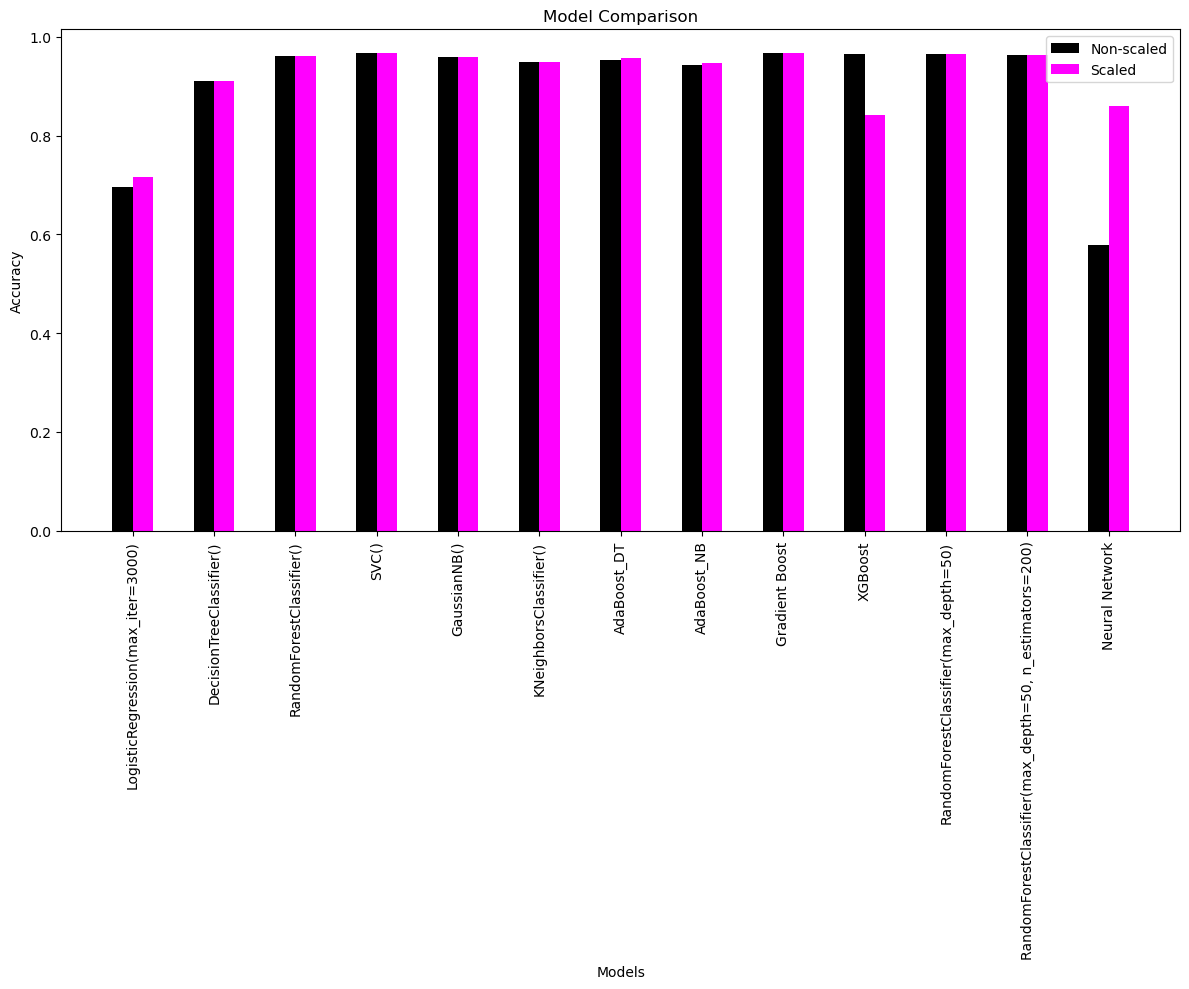

In [60]:
bar_width=0.25
num_models=len(models)
index = np.arange(num_models)

plt.figure(figsize=(12, 10))
plt.bar(index-bar_width/2, accuracies, bar_width, label="Non-scaled", color="black")
plt.bar(index+bar_width/2, accuracies_s, bar_width, label="Scaled", color="magenta")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(index, models, rotation=90)
plt.title("Model Comparison")
plt.legend()
plt.tight_layout()

In [61]:
# Best Accuracy, recall and f1-score given by Gradient Boost equal on scaled and non-scaled data
# Best Precision - Almost equal for Support Vector Machine (approximately equal for scaled and non-scaled) and Gradient Boost

In [13]:
x_test, y_test = eeg_dataloader.testing()

In [30]:
predictions_tst = gradb_clf.predict(x_test)

accuracy_gb = accuracy_score(y_test, predictions_tst)
print(f"Accuracy = {accuracy_gb*100:.2f}")

Accuracy = 98.93


In [ ]:
# Accuracy of final model - 98.93%